In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

#Data onboarding
platform_avail = pd.read_csv("../resources/MoviesOnStreamingPlatforms_updated.csv")
movies = pd.read_csv("../resources/movies.csv", encoding = "ISO-8859-1", dtype = {"country": "string"})
imdb = pd.read_csv("../resources/IMDb movies.csv")

platform_movies = list(platform_avail["Title"]) #p
movies_movies = list(movies["name"]) #m
imdb_movies = list(imdb["title"])#i

# for row_i in range(len(platform_avail)):
#     platform_avail = platform_avail.rename(index = {row_i: platform_movies[row_i]})
# for row_i in range(len(movies)):
#     movies = movies.rename(index = {row_i: movies_movies[row_i]})
# for row_i in range(len(imdb_movies)):
#     imdb = imdb.rename(index = {row_i: imdb_movies[row_i]})

In [28]:
netflix = list(platform_avail["Netflix"])
hulu = list(platform_avail["Hulu"])
prime = list(platform_avail["Prime Video"])
disney = list(platform_avail["Disney+"])
platform_avail.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [29]:
#DIVERSITY RANKING BY YEARS

def simpson_index(year_count):
    total_count = 0
    for key in year_count:
        total_count += year_count[key]
    denom = total_count * (total_count - 1)
    
    numer = 0
    for key in year_count:
        numer = numer + (year_count[key] * (year_count[key] - 1))
    return 1 - (numer/denom)

def acquire_years(df, avail):
    years = []
    for row_i in range(len(df)):
        if avail[row_i]:
            years.append(df.iloc[row_i, 3])
    return years

netflix_years = acquire_years(platform_avail, netflix)
hulu_years = acquire_years(platform_avail, hulu)
prime_years = acquire_years(platform_avail, prime)
disney_years = acquire_years(platform_avail, disney)

#DIVERSITY FOR YEARS -- Disney, Prime, Hulu, Netflix
print(simpson_index(Counter(netflix_years)))
print(simpson_index(Counter(hulu_years)))
print(simpson_index(Counter(prime_years)))
print(simpson_index(Counter(disney_years)))
# hulu_years = []
# for row_i in range(len())

0.9058672269385101
0.9175696679950792
0.9655710259008249
0.9778604990993034


(array([  11.,    0.,    4.,   11.,   28.,   52.,   81.,  159.,  530.,
        2684.]),
 array([1942. , 1949.8, 1957.6, 1965.4, 1973.2, 1981. , 1988.8, 1996.6,
        2004.4, 2012.2, 2020. ]),
 <BarContainer object of 10 artists>)

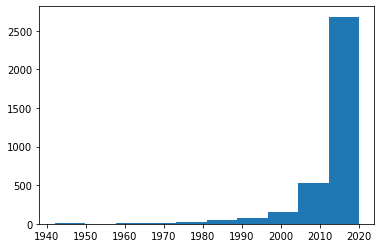

In [30]:
plt.hist(netflix_years)

(array([  1.,   0.,   4.,   6.,   5.,  10.,  26.,  46., 129., 676.]),
 array([1923. , 1932.7, 1942.4, 1952.1, 1961.8, 1971.5, 1981.2, 1990.9,
        2000.6, 2010.3, 2020. ]),
 <BarContainer object of 10 artists>)

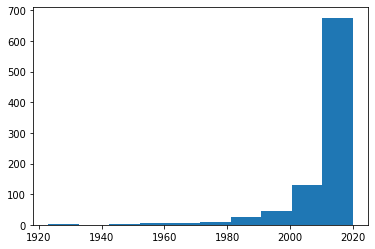

In [31]:
plt.hist(hulu_years)

(array([4.000e+00, 3.500e+01, 2.820e+02, 4.470e+02, 3.650e+02, 5.160e+02,
        8.080e+02, 8.680e+02, 2.213e+03, 6.816e+03]),
 array([1902. , 1913.8, 1925.6, 1937.4, 1949.2, 1961. , 1972.8, 1984.6,
        1996.4, 2008.2, 2020. ]),
 <BarContainer object of 10 artists>)

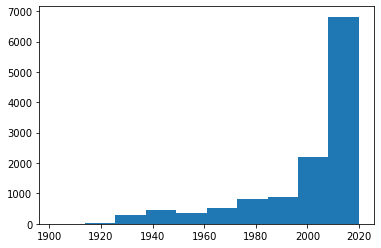

In [32]:
plt.hist(prime_years)

(array([  4.,   4.,  10.,  23.,  23.,  34.,  35., 101., 175., 155.]),
 array([1921. , 1930.9, 1940.8, 1950.7, 1960.6, 1970.5, 1980.4, 1990.3,
        2000.2, 2010.1, 2020. ]),
 <BarContainer object of 10 artists>)

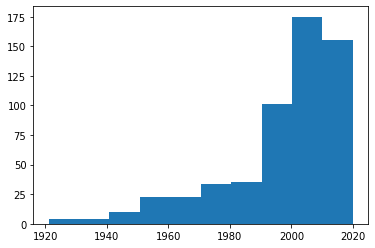

In [33]:
plt.hist(disney_years)

In [34]:
# inters_p_m = set(platform_movies) & set(movies_movies) #Movies common to p and m
# inters_p_i = set(platform_movies) & set(imdb_movies) #Movies common to p and i
# inters_comm = list(set(inters_p_m) & set(inters_p_i)) #Movies common to intersection

# only_p_i = set()
# for e in inters_p_i:
#     if e not in inters_comm:
#         only_p_i.add(e)
        
#Use inters_p_m & only_p_i to avoid duplicates

In [39]:
#DIVERSITY RANKING BY COUNTRY
def acquire_countries(df, avail):
    countries = []
    for row_i in range(len(df)):
        if avail[row_i]:
            if isinstance(df.iloc[row_i, -3], float):
                continue
            for country in df.iloc[row_i, -3].split(","):
                countries.append(country)
    return countries

#Best to worst, Netflix, Hulu, Prime, Disney
print(simpson_index(Counter(acquire_countries(platform_avail, netflix))))
print(simpson_index(Counter(acquire_countries(platform_avail, hulu))))
print(simpson_index(Counter(acquire_countries(platform_avail, prime))))
print(simpson_index(Counter(acquire_countries(platform_avail, disney))))



0.8204047109109999
0.7141965701179112
0.7072553300228102
0.40569195094547106


In [42]:
#DIVERSITY RANKING BY GENRE
def acquire_genres(df, avail):
    genres = []
    for row_i in range(len(df)):
        if avail[row_i]:
            if isinstance(df.iloc[row_i, -4], float):
                continue
            for genre in df.iloc[row_i, -4].split(","):
                genres.append(genre)
    return genres

#Ranking: Hulu, Prime, Netflix, Disney
print(simpson_index(Counter(acquire_genres(platform_avail, netflix))))
print(simpson_index(Counter(acquire_genres(platform_avail, hulu))))
print(simpson_index(Counter(acquire_genres(platform_avail, prime))))
print(simpson_index(Counter(acquire_genres(platform_avail, disney))))

0.9099003333993214
0.9179960689474018
0.9151658641790695
0.8967356129721197


In [43]:
#DIVERSITY RANKING BY LANGUAGE
def acquire_languages(df, avail):
    languages = []
    for row_i in range(len(df)):
        if avail[row_i]:
            if isinstance(df.iloc[row_i, -2], float):
                continue
            for language in df.iloc[row_i, -2].split(","):
                languages.append(language)
    return languages

#Ranking: Netflix, Hulu, Prime, Disney
print(simpson_index(Counter(acquire_languages(platform_avail, netflix))))
print(simpson_index(Counter(acquire_languages(platform_avail, hulu))))
print(simpson_index(Counter(acquire_languages(platform_avail, prime))))
print(simpson_index(Counter(acquire_languages(platform_avail, disney))))

0.7437782324913043
0.579391051295893
0.5188551099143195
0.3881300065608291


In [45]:
#DIVERSITY RANKING BY AGE
def acquire_ages(df, avail):
    ages = []
    for row_i in range(len(df)):
        if avail[row_i]:
            ages.append(df.iloc[row_i, 4])
    return ages

#Ranking: Hulu, Netflix, Disney, Prime
print(simpson_index(Counter(acquire_ages(platform_avail, netflix))))
print(simpson_index(Counter(acquire_ages(platform_avail, hulu))))
print(simpson_index(Counter(acquire_ages(platform_avail, prime))))
print(simpson_index(Counter(acquire_ages(platform_avail, disney))))

0.654028558710154
0.7415341323452498
0.5876615424459803
0.6412582038975599


In [48]:
#DIVERSITY RANKING BY RUNTIME
def acquire_runtimes(df, avail):
    runtimes = []
    for row_i in range(len(df)):
        if avail[row_i]:
            runtimes.append(df.iloc[row_i, -1])
    return runtimes

#Ranking: Netflix, Disney, Prime, Hulu
print(simpson_index(Counter(acquire_runtimes(platform_avail, netflix))))
print(simpson_index(Counter(acquire_runtimes(platform_avail, hulu))))
print(simpson_index(Counter(acquire_runtimes(platform_avail, prime))))
print(simpson_index(Counter(acquire_runtimes(platform_avail, disney))))

0.9885788837288596
0.9800639897066443
0.982619946002909
0.9857337213257247


In [34]:
platform_avail.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [33]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
